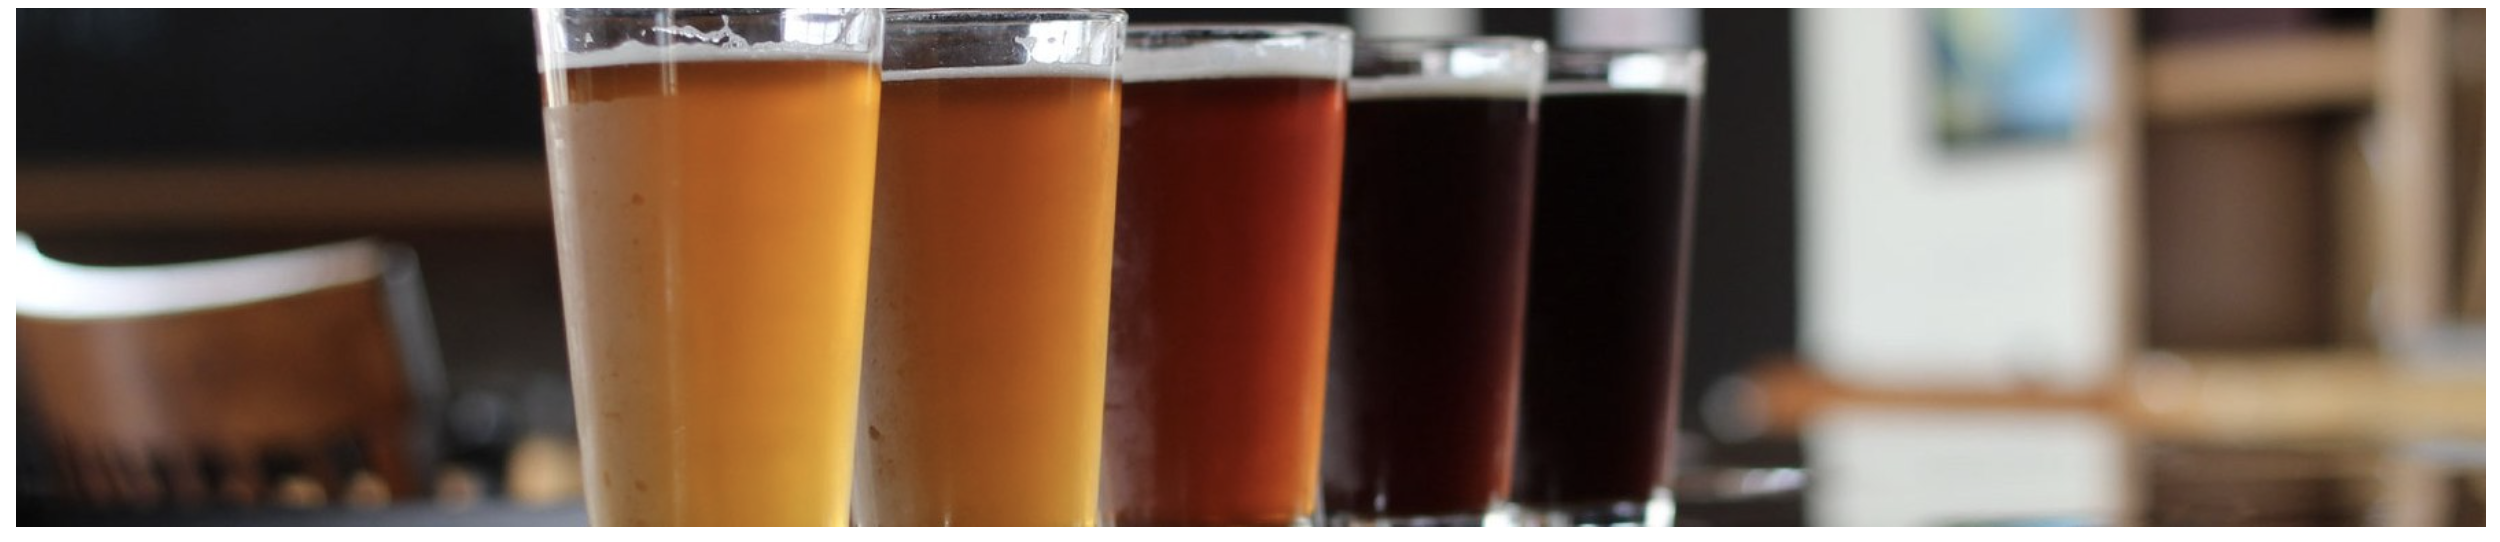

# About Dataset

This is the dataset discussed in the talk " How to hire and test for data skills: A one-size-fits-all interview kit" from  

https://conferences.oreilly.com/strata/strata-ny-2017/public/schedule/detail/59542

This files contains around 1.5 Millions reviews of Beer from BeerAdvocates.  

Each review includes ratings in terms of five "aspects": appearance, aroma, palate, taste, and overall impression. Reviews include product and user information, followed by each of these five ratings.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('beer_reviews.csv')

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.50,2.00,2.50,stcules,Hefeweizen,1.50,1.50,Sausa Weizen,5.00,47986
1,10325,Vecchio Birraio,1235915097,3.00,2.50,3.00,stcules,English Strong Ale,3.00,3.00,Red Moon,6.20,48213
2,10325,Vecchio Birraio,1235916604,3.00,2.50,3.00,stcules,Foreign / Export Stout,3.00,3.00,Black Horse Black Beer,6.50,48215
3,10325,Vecchio Birraio,1234725145,3.00,3.00,3.50,stcules,German Pilsener,2.50,3.00,Sausa Pils,5.00,47969
4,1075,Caldera Brewing Company,1293735206,4.00,4.50,4.00,johnmichaelsen,American Double / Imperial IPA,4.00,4.50,Cauldron DIPA,7.70,64883


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [5]:
df.shape

(1586614, 13)

**Rows represent reviews rated for each beer.This dataset contains 1.586.614 reviews of Beer**

In [6]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

**There is very little missing data and these observations can be ignored.**

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(1518478, 13)

In [9]:
df['review_time'] = pd.to_datetime(df.review_time, unit='s')

**The review_time column needs to convert the data type from int to datetime.**

In [10]:
df['year'] = df.review_time.dt.year

In [11]:
df['review_time'].max(), df['review_time'].min()

(Timestamp('2012-01-11 12:35:48'), Timestamp('1996-08-22 00:00:01'))

In [12]:
df[df.duplicated(['review_profilename', 'beer_name'],keep=False)][:5]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,year
187,1075,Caldera Brewing Company,2010-08-10 02:34:50,4.00,4.00,4.00,barleywinefiend,American Pale Ale (APA),4.00,4.00,Caldera Pale Ale,5.50,25414,2010
199,1075,Caldera Brewing Company,2010-06-22 02:27:01,4.00,3.50,3.50,barleywinefiend,American Pale Ale (APA),3.50,4.00,Caldera Pale Ale,5.50,25414,2010
389,1075,Caldera Brewing Company,2010-09-11 20:39:24,4.00,4.00,4.00,barleywinefiend,American IPA,3.50,3.50,Caldera IPA,6.10,10784,2010
426,1075,Caldera Brewing Company,2010-06-22 02:22:12,3.50,3.50,4.00,barleywinefiend,American IPA,3.50,3.50,Caldera IPA,6.10,10784,2010
804,1075,Caldera Brewing Company,2007-02-14 01:09:21,4.00,3.50,4.00,flexabull,American Amber / Red Ale,4.00,3.50,Ashland Amber,5.40,10785,2007


**Users who gave more than 1 vote for the same beer have been detected.**

In [13]:
df = df.drop_duplicates(subset=['review_profilename', 'beer_name'], keep='first')

In [14]:
df.shape

(1496263, 14)

In [15]:
df.describe()

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,year
count,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00,1496263.00
mean,3068.15,3.82,3.75,3.85,3.75,3.80,7.05,21434.49,2008.33
std,5540.52,0.72,0.70,0.61,0.68,0.73,2.33,21798.31,2.40
min,1.00,0.00,1.00,0.00,1.00,1.00,0.01,5.00,1998.00
25%,141.00,3.50,3.50,3.50,3.50,3.50,5.20,1655.00,2007.00
50%,414.00,4.00,4.00,4.00,4.00,4.00,6.50,12895.00,2009.00
75%,2250.00,4.50,4.00,4.00,4.00,4.50,8.50,39273.00,2010.00
max,28003.00,5.00,5.00,5.00,5.00,5.00,57.70,77316.00,2012.00


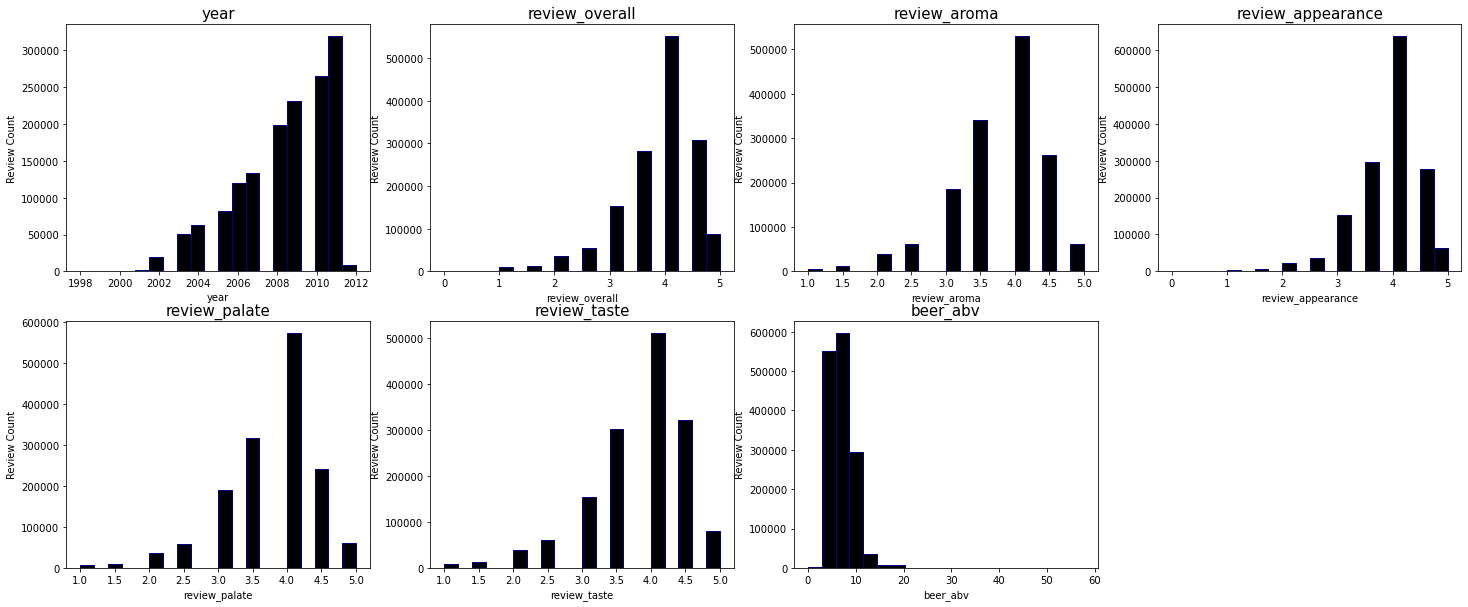

In [16]:
num_cols = ['year', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

plt.figure(figsize=(25, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    ax = plt.hist(df[col], color='black', edgecolor='darkblue', bins=20)
    plt.xlabel(f'{col}')
    plt.ylabel('Review Count')
    plt.title(f'{col}', fontsize=15)
plt.show()

- It has been observed that the number of comments has been increasing in recent years.  
- Although beers with less than 10% Alcohol content are more common in the dataset, extremely strong beers are also included in the dataset.  
- When looked at according to 5 different review criteria, it is seen that the 4 points given are quite dominant.

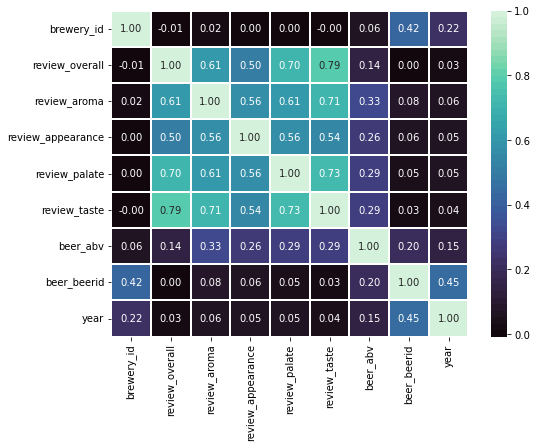

In [17]:
corr = df.corr()
plt.figure(figsize=(8, 6))
palette = sns.color_palette('mako', 50)
sns.heatmap(corr, annot=True, linewidth=.1, cmap=palette, fmt='.2f')
plt.show()

- The two criteria with the highest correlation with the overall review criteria are review palate and review taste.  
- We can say that people care more about the taste of beer than its appearance of it.

## User Analysis

In [18]:
df['review_profilename'].nunique()

32908

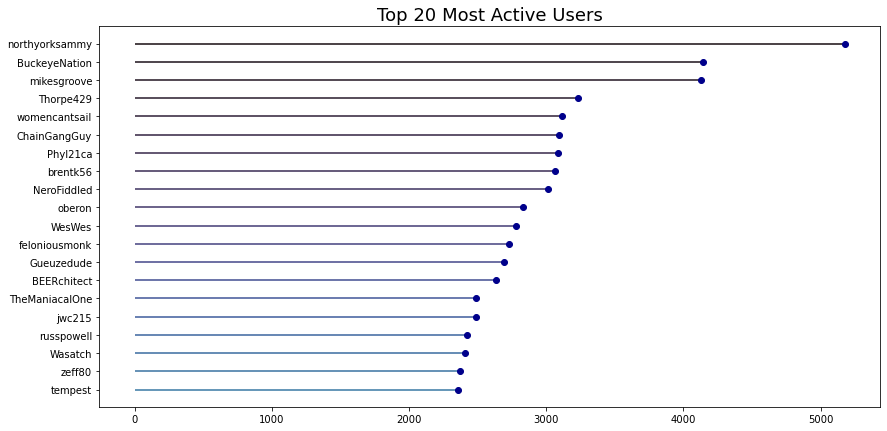

In [19]:
df_profile = pd.DataFrame(df['review_profilename'].value_counts())
plt.figure(figsize=(14, 7))
palette = sns.color_palette('mako', 40)
plt.hlines(y=df_profile[:20].index, xmin=0, xmax=df_profile['review_profilename'][:20], color=palette)
plt.plot(df_profile['review_profilename'][:20], df_profile[:20].index,  'o', color='darkblue')
plt.title('Top 20 Most Active Users', fontsize=18)
plt.gca().invert_yaxis()

## Beer Name Analysis

In [20]:
df['beer_name'].nunique()

44075

**Although the dataset contains over 40,000 unique beers, many of them have very few comments.It will be more effective for us to examine beers with a number of reviews greater than a certain threshold in the statistics that we will make according to different review criteria.**

In [21]:
def abv_group(beer_abv):
    if beer_abv <= 4.5:
        return 'light'
    elif beer_abv <= 6:
        return 'medium'
    elif beer_abv <= 8:
        return 'medium_high'
    elif beer_abv <= 10:
        return 'high'
    elif beer_abv <= 15:
        return 'very_high'
    else:
        return 'extremely_strong'

df['abv_group'] = df['beer_abv'].map(abv_group)

**I think the alcohol content of beers can play an important role in the ratings given.Since the ABV standard is used worldwide for all alcoholic beverages, it is perhaps the most important element of a beer’s vital stats. In the continuation of the study, evaluations will be made according to alcohol contents.**

In [22]:
review_counts = pd.DataFrame(df['beer_name'].value_counts())
rare_beers = review_counts[review_counts['beer_name'] < 300].index
common_beers = df[~df['beer_name'].isin(rare_beers)]

In [23]:
common_beers.shape

(787141, 15)

In [24]:
common_beers["beer_name"].nunique()

1167

**Only 1167 of the 44075 unique beers contain more than half of all reviews.**

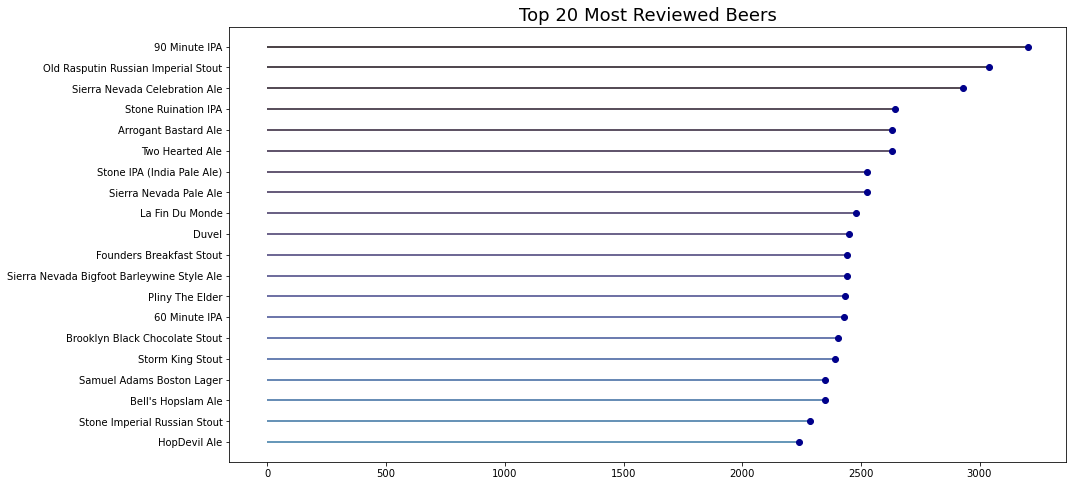

In [25]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette('mako', 40)
plt.hlines(y=review_counts[:20].index, xmin=0, xmax=review_counts['beer_name'][:20], color=palette)
plt.plot(review_counts['beer_name'][:20], review_counts[:20].index,  'o', color='darkblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Reviewed Beers', fontsize=18)
plt.show()

- At first glance, Ale style stands out as the type of beer with the most comments.

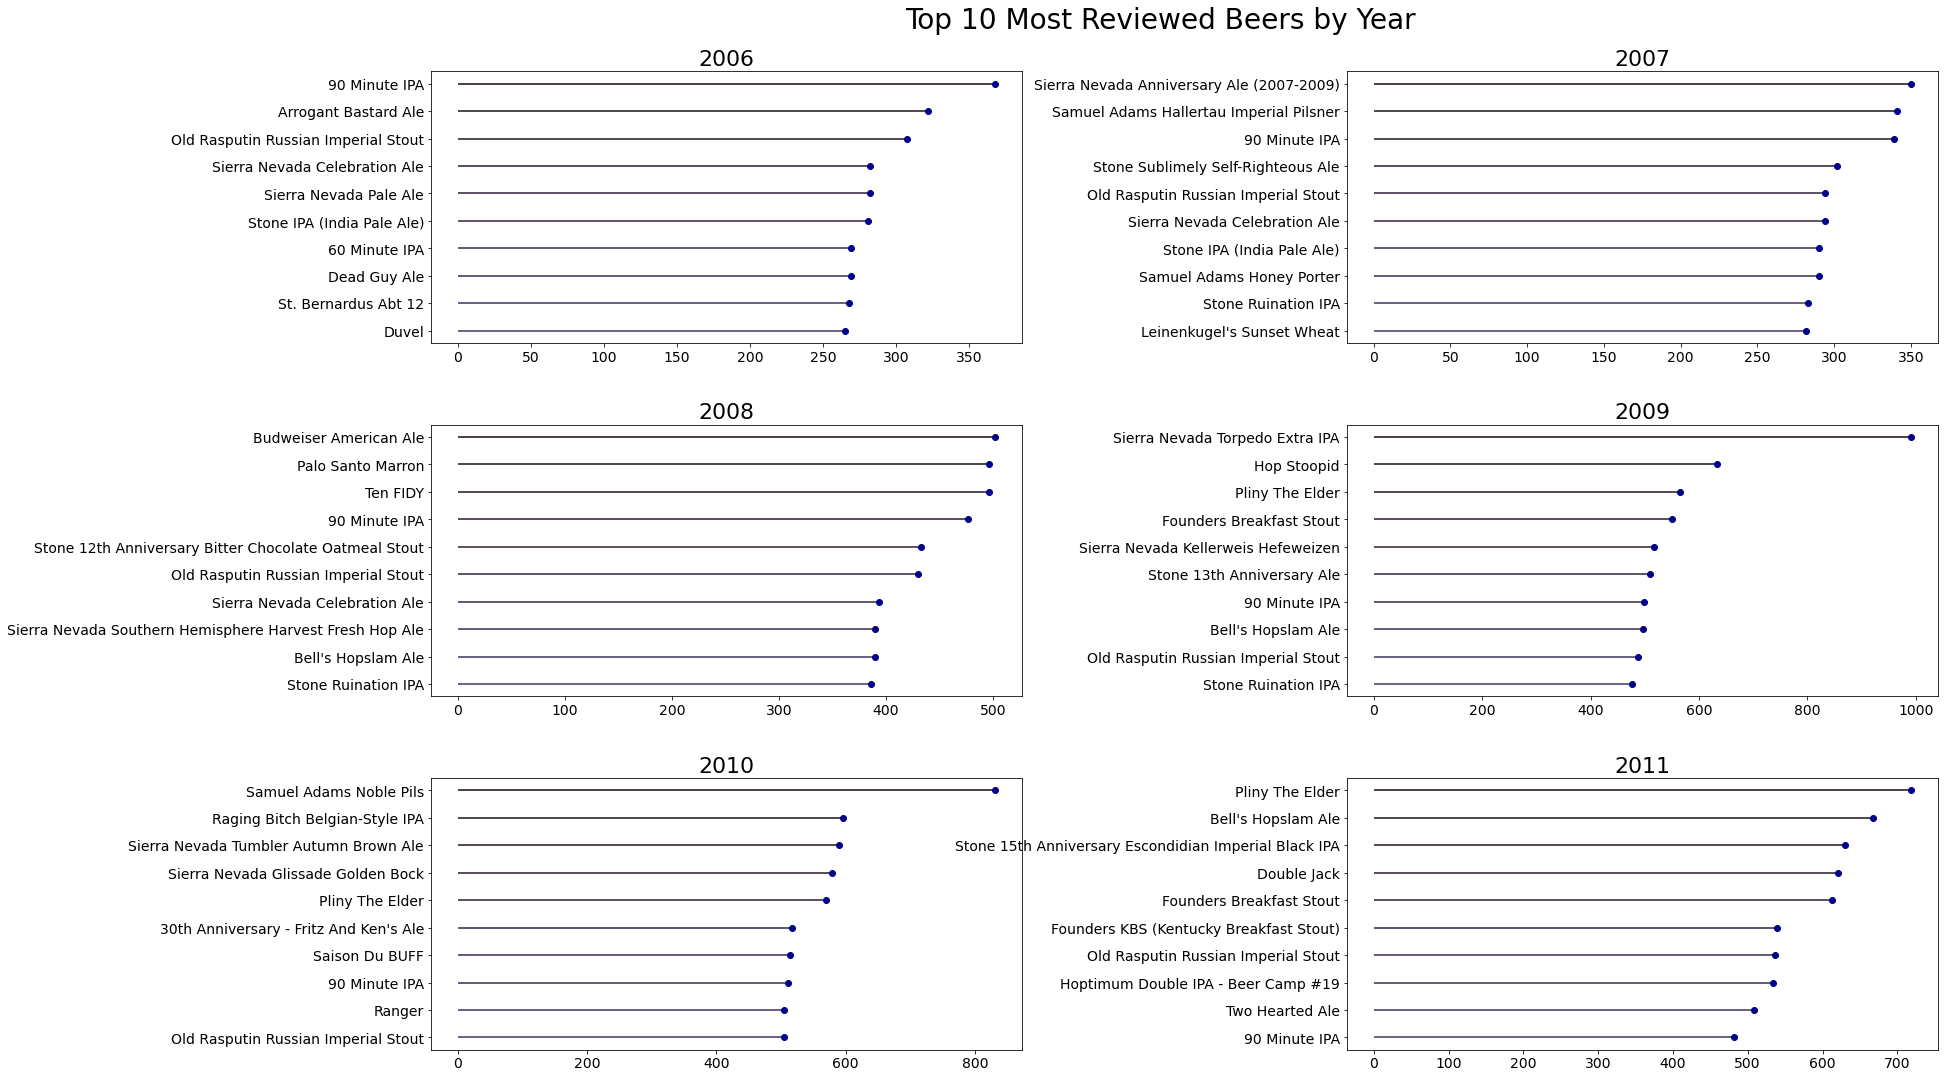

In [26]:
plt.figure(figsize=(27, 18))
for i, year in enumerate([2006, 2007, 2008, 2009, 2010, 2011]):
    plt.subplot(3, 2, i+1)
    beer_year = pd.DataFrame(df.loc[df['year'] == year, 'beer_name'].value_counts())
    palette = sns.color_palette('mako', 40)
    plt.hlines(y=beer_year[:10].index, xmin=0, xmax=beer_year['beer_name'][:10], color=palette)
    plt.plot(beer_year['beer_name'][:10], beer_year[:10].index,  "o", color="darkblue")
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"{year}", fontsize=22)
    plt.suptitle('Top 10 Most Reviewed Beers by Year', y=0.93, fontsize=28)
plt.subplots_adjust(wspace=0.55, hspace=0.3)
plt.show()

- When we look at the most commented beers by year, we see that the graph above can mislead us since it is not possible to catch a trend in the first chart .

### Beers with the highest rating among beers with a total review count of at least 300

In [27]:
common_beers.groupby('beer_name')['review_overall'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'], ascending=[False, False])[:10]  

,count,mean
beer_name,,
Heady Topper,443,4.62
Trappist Westvleteren 12,1272,4.62
Pliny The Younger,592,4.60
Pliny The Elder,2432,4.59
Founders CBS Imperial Stout,618,4.59
Live Oak HefeWeizen,318,4.56
Portsmouth Kate The Great,420,4.54
Weihenstephaner Hefeweissbier,1951,4.52
Trappist Westvleteren 8,707,4.51


### Beers with the highest rating among beers with a total review count of at least 300

In [28]:
common_beers.groupby('beer_name')['review_overall'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'],ascending=[True, False])[:10]

,count,mean
beer_name,,
Wild Blue (Blueberry Lager),481,1.92
Corona Light,339,1.96
Michelob Ultra,518,2.15
Miller Chill,367,2.28
Samuel Adams Triple Bock,604,2.36
Bud Light,1252,2.41
Busch Light,350,2.45
Busch Beer,368,2.48
Natural Light,525,2.52


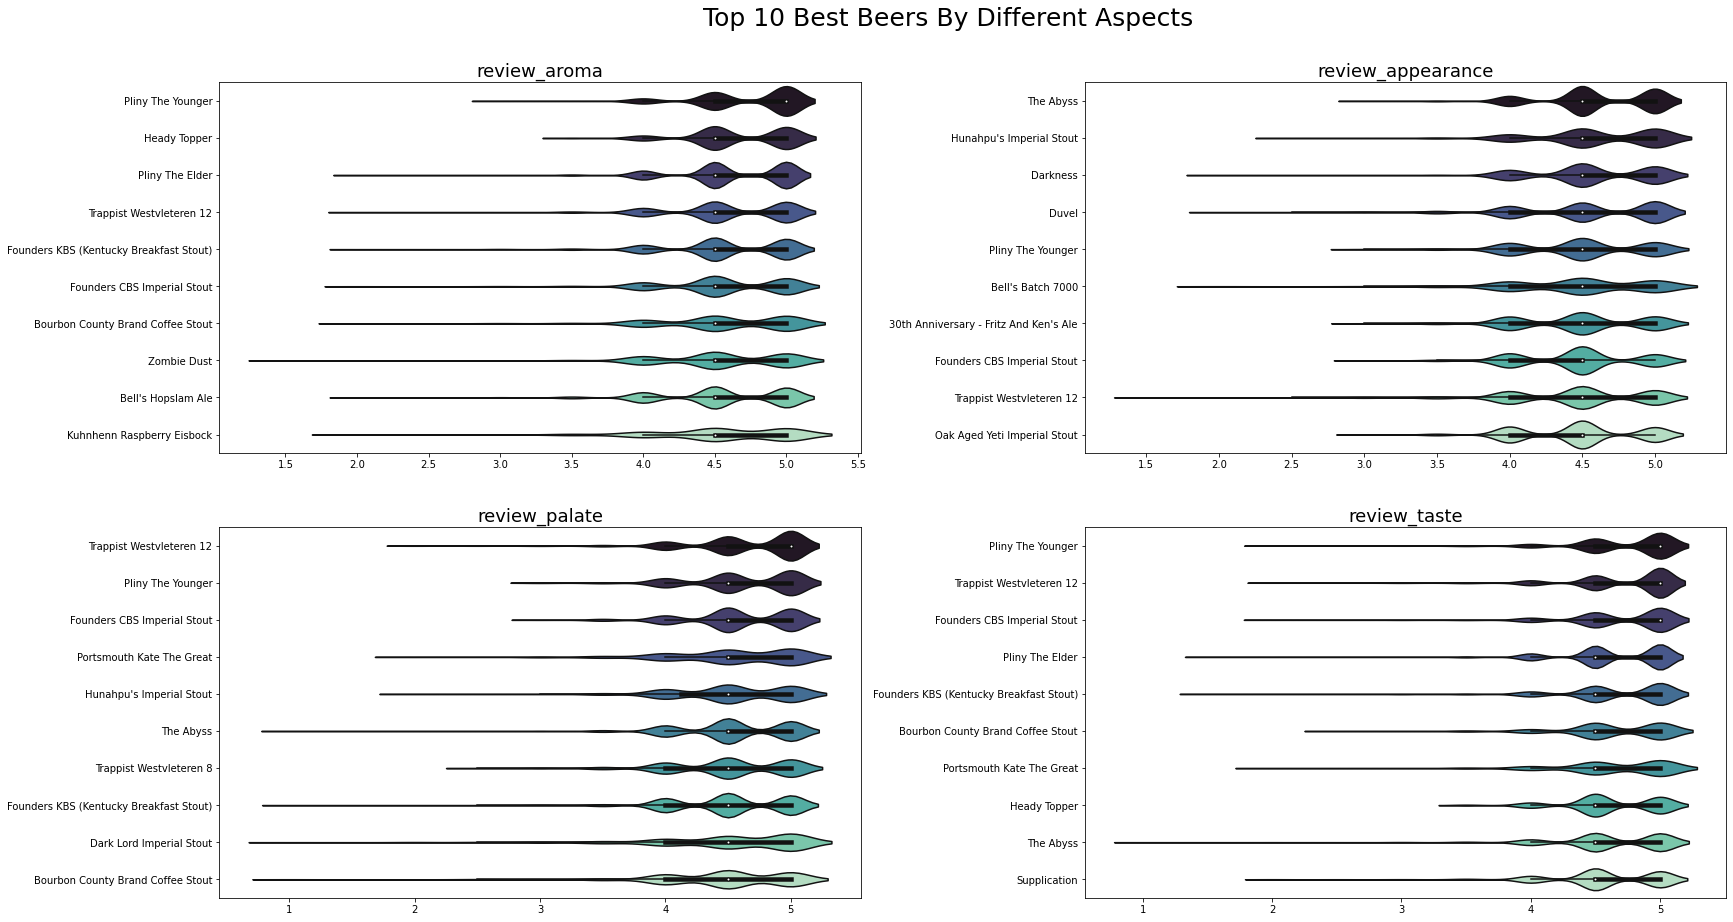

In [29]:
cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
plt.figure(figsize=(27, 15))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    order = common_beers.groupby('beer_name')[col].mean().sort_values(ascending=False)[:10].index
    palette = sns.color_palette('mako', 15)
    ax = sns.violinplot(y='beer_name', x=col ,palette='mako', data=df, order=order)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f"{col}",fontsize=18)
    plt.suptitle('Top 10 Best Beers By Different Aspects', y=0.95, size=25)
plt.subplots_adjust(wspace=0.35, hspace=0.2)
plt.show()

- The ratings given to beers vary according to different rating criteria.  
- For example, The Abyss, which has the highest rating in the points given according to its appearance, is not in the top 10 in the ratings given according to the aroma and is ranked lower in other criteria.

## Brewery Name Analysis

In [30]:
df['brewery_name'].nunique()

5135

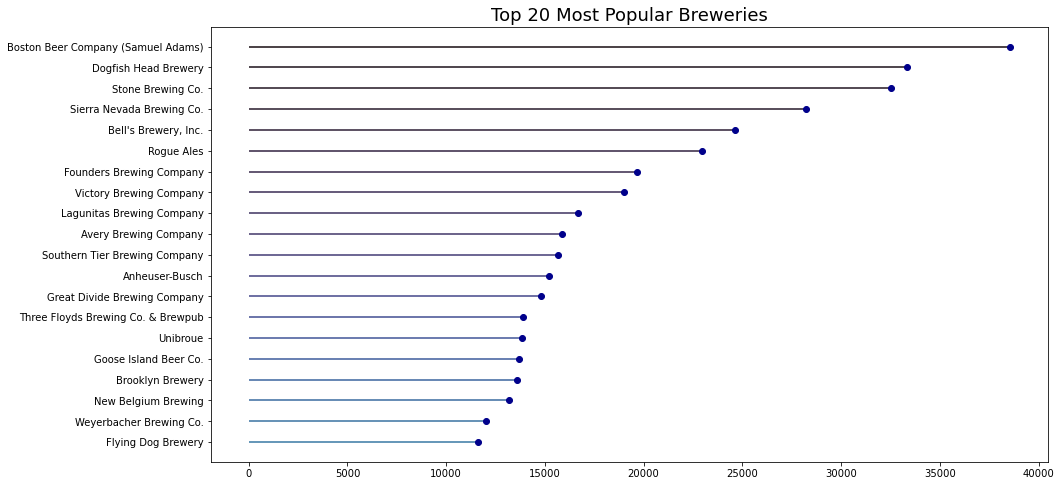

In [31]:
df_brewery = pd.DataFrame(df['brewery_name'].value_counts())
plt.figure(figsize=(15, 8))
palette = sns.color_palette('mako', 40)
plt.hlines(y=df_brewery[:20].index, xmin=0, xmax=df_brewery['brewery_name'][:20], color=palette)
plt.plot(df_brewery['brewery_name'][:20], df_brewery[:20].index,  "o", color="darkblue")
plt.gca().invert_yaxis()
plt.title('Top 20 Most Popular Breweries', fontsize=18)
plt.show()

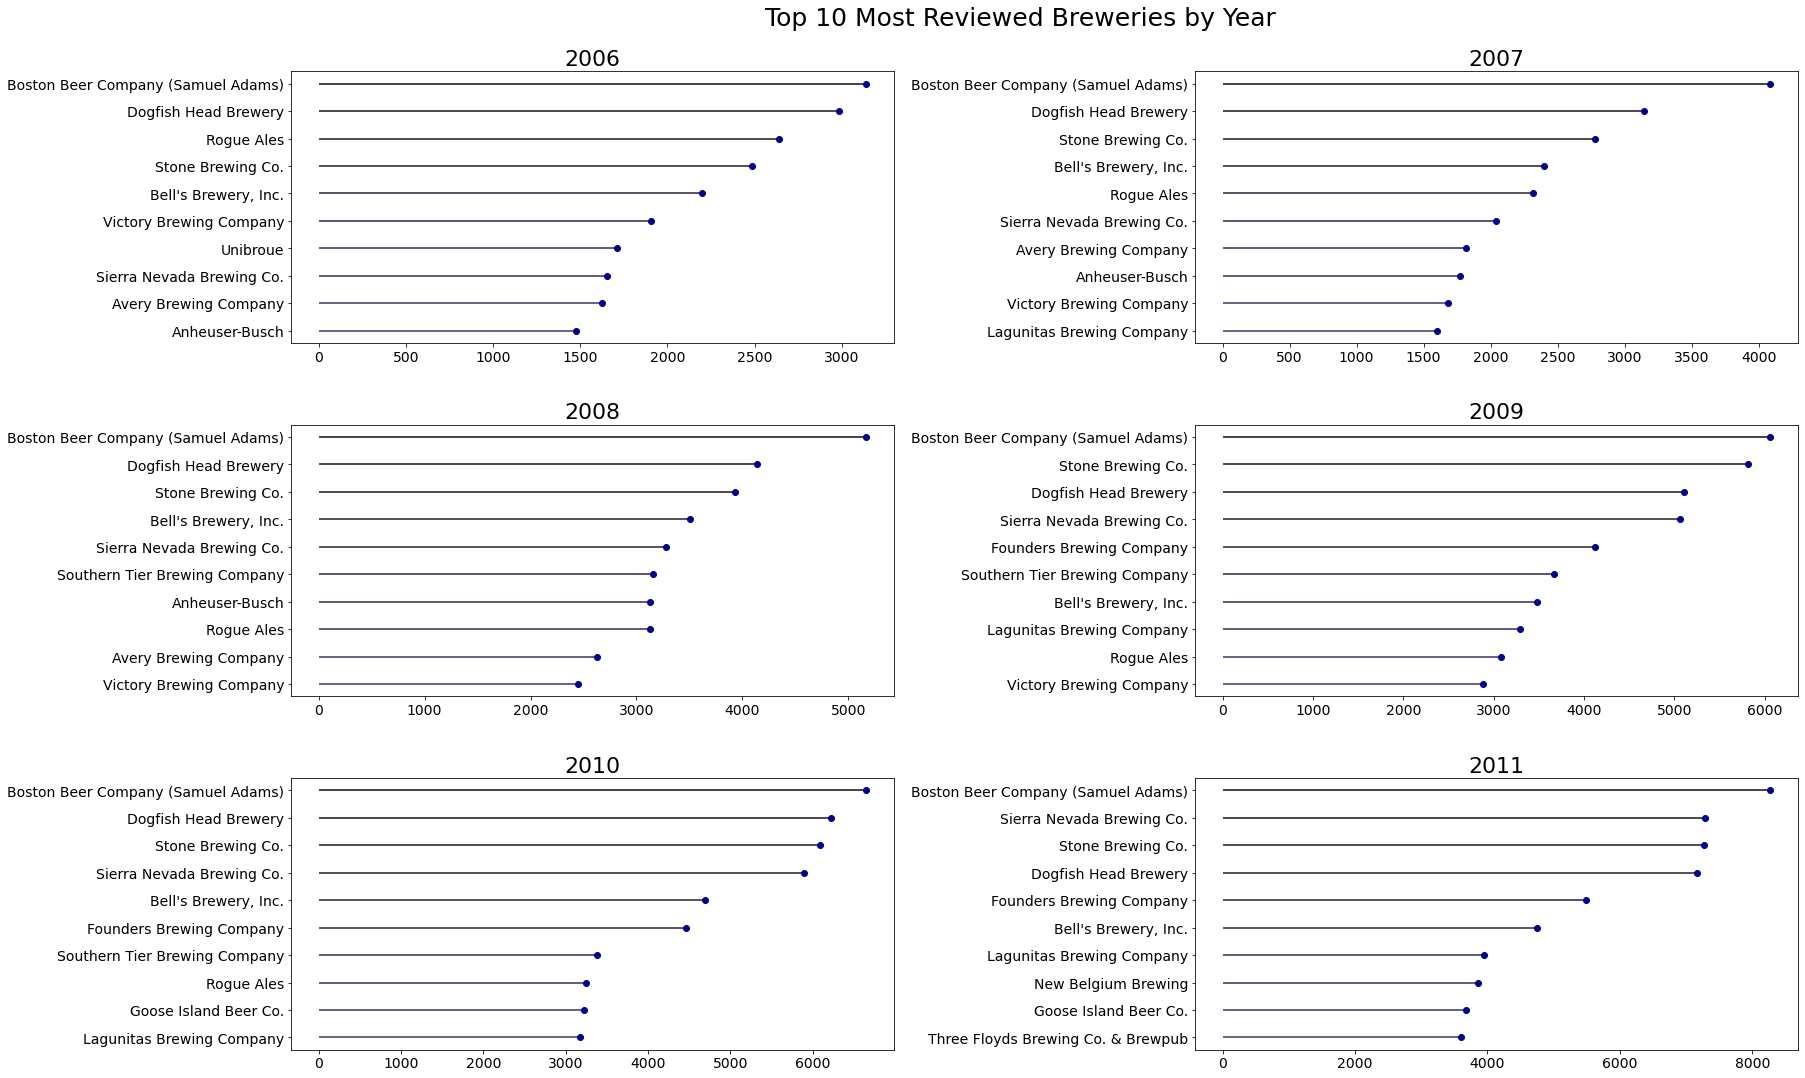

In [32]:
plt.figure(figsize=(27, 18))
for i, year in enumerate([2006, 2007, 2008, 2009, 2010, 2011]):
    plt.subplot(3, 2, i+1)
    brewery_year = pd.DataFrame(df.loc[df['year'] == year, 'brewery_name'].value_counts())
    palette = sns.color_palette('mako', 40)
    plt.hlines(y=brewery_year[:10].index, xmin=0, xmax=brewery_year['brewery_name'][:10], color=palette)
    plt.plot(brewery_year['brewery_name'][:10], brewery_year[:10].index,  "o", color="darkblue")
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"{year}", fontsize=22)
    plt.suptitle('Top 10 Most Reviewed Breweries by Year', y=0.93, fontsize=25)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

- While the Boston Beer Company maintains the title of the most commented brewery in the last 6 years, we can say that Sierra Nevada Brewing Co. has an increasing trend.

In [33]:
rare_breweries = df_brewery[df_brewery['brewery_name'] < 2000].index
common_breweries = df[~df['brewery_name'].isin(rare_breweries)]

In [34]:
common_breweries.shape

(1017438, 15)

In [35]:
common_breweries['brewery_name'].nunique()

160

**Although there are 5135 unique breweries in the dataset, only 160 of them account for the majority of all reviews.**

### Breweries with the highest rating among breweries with a total review count of at least 2000

In [36]:
common_breweries.groupby('brewery_name')['review_overall'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'],ascending=[False, False])[:10]

,count,mean
brewery_name,,
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren),2378,4.54
Russian River Brewing Company,10934,4.38
Bayerische Staatsbrauerei Weihenstephan,6212,4.29
Brasserie de Rochefort,4493,4.27
Surly Brewing Company,6056,4.26
Minneapolis Town Hall Brewery,2572,4.26
Brouwerij St. Bernardus NV,6304,4.21
Alpine Beer Company,2884,4.21
Privatbrauerei Franz Inselkammer KG / Brauerei Aying,5256,4.19


### Breweries with the lowest rating among breweries with a total review count of at least 2000

In [37]:
common_breweries.groupby('brewery_name')['review_overall'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'],ascending=[True, False])[:10]

,count,mean
brewery_name,,
Miller Brewing Co.,5480,2.76
Anheuser-Busch,15226,2.80
Grupo Modelo S.A. de C.V.,3351,2.95
Coors Brewing Company,7087,3.13
"Cervecería Cuauhtémoc Moctezuma, S.A. de C.V.",2725,3.20
Pabst Brewing Company,3992,3.27
Baltika Breweries,2042,3.30
Jacob Leinenkugel Brewing Company,4931,3.33
Genesee Brewing Co. / Dundee Brewing Co.,3690,3.38


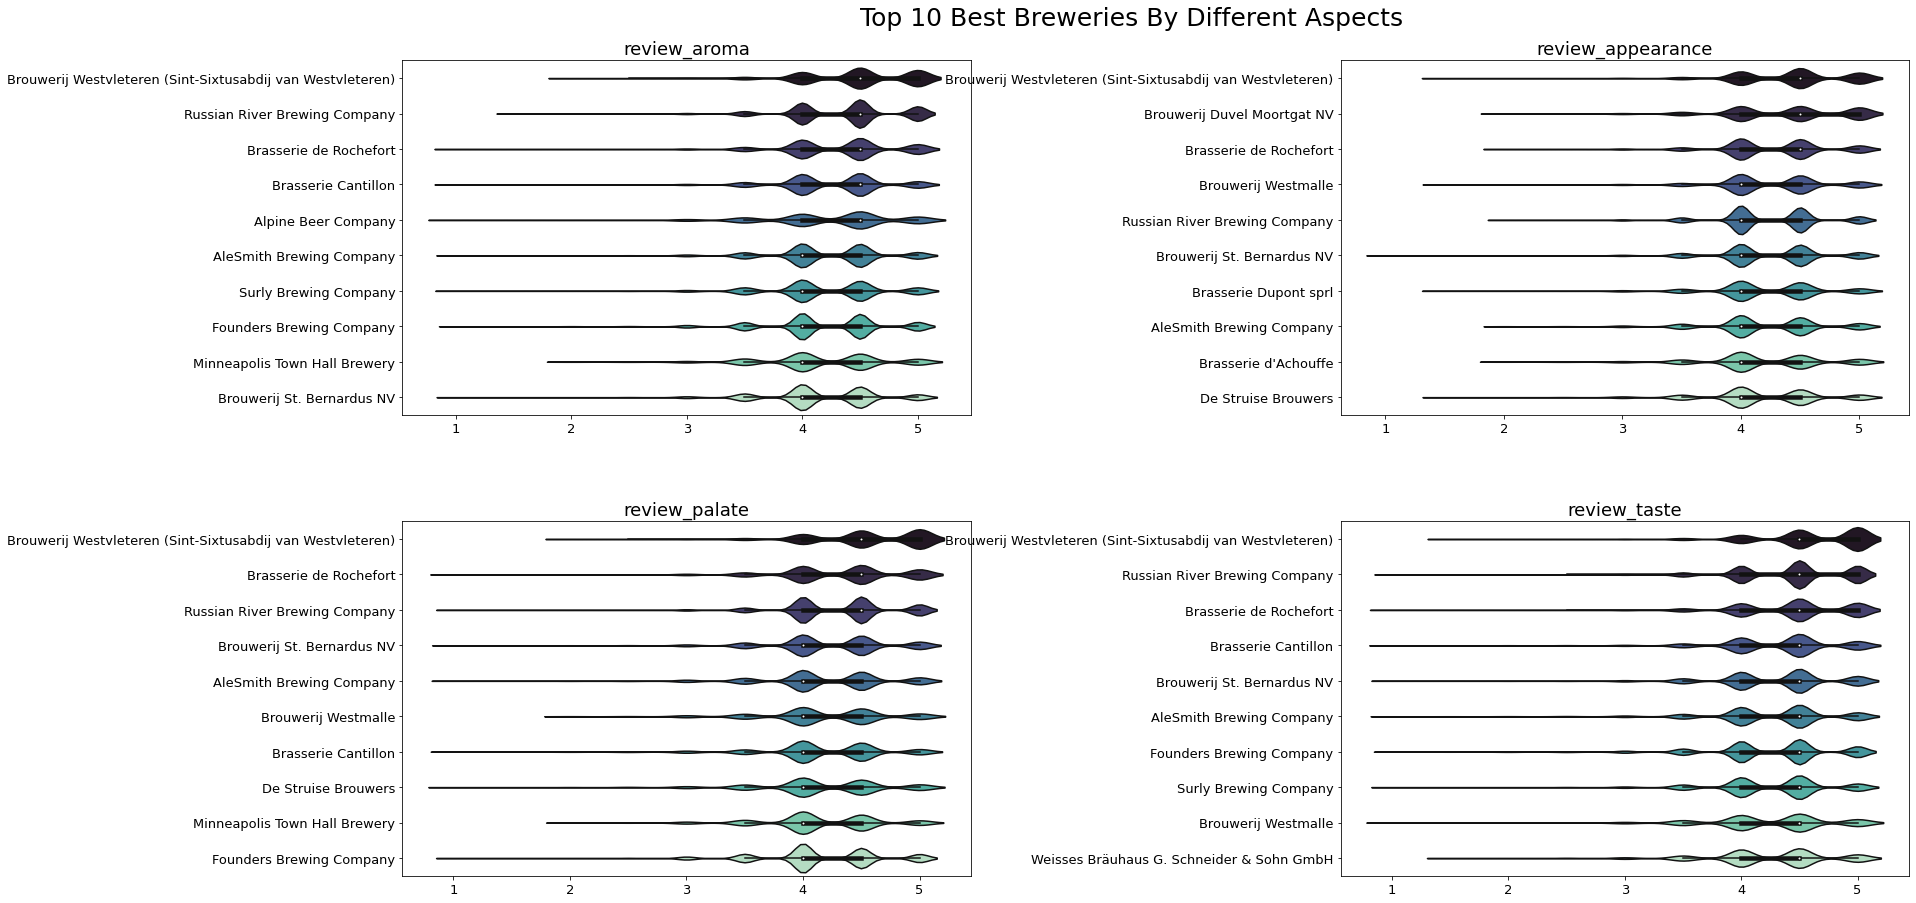

In [38]:
cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
plt.figure(figsize=(27, 15))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    order = common_breweries.groupby('brewery_name')[col].mean().sort_values(ascending=False)[:10].index
    ax = sns.violinplot(y='brewery_name', x=col, palette='mako', data=df, order=order)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title(f"{col}",fontsize=18)
    plt.suptitle('Top 10 Best Breweries By Different Aspects', y=0.93, size=25)
plt.subplots_adjust(wspace=0.65, hspace=0.3)
plt.show()

- Brouwerij Westvleteren stands out as the most successful brewery in all evaluation criterias.

## Beer Style Analysis

In [39]:
df['beer_style'].nunique()

104

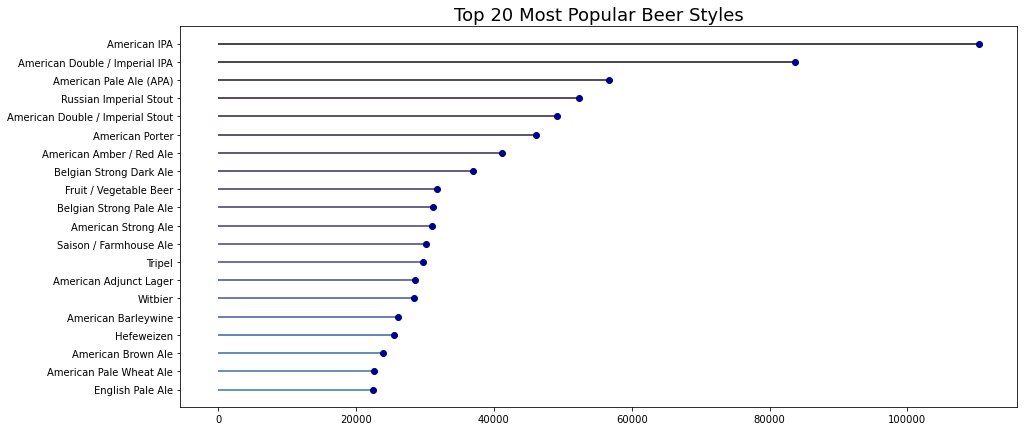

In [40]:
df_style = pd.DataFrame(df['beer_style'].value_counts())
plt.figure(figsize=(15, 7))
palette = sns.color_palette('mako', 40)
plt.hlines(y=df_style[:20].index, xmin=0, xmax=df_style['beer_style'][:20], color=palette)
plt.plot(df_style['beer_style'][:20], df_style[:20].index,  "o", color="darkblue")
plt.gca().invert_yaxis()
plt.title('Top 20 Most Popular Beer Styles', fontsize=18)
plt.show()

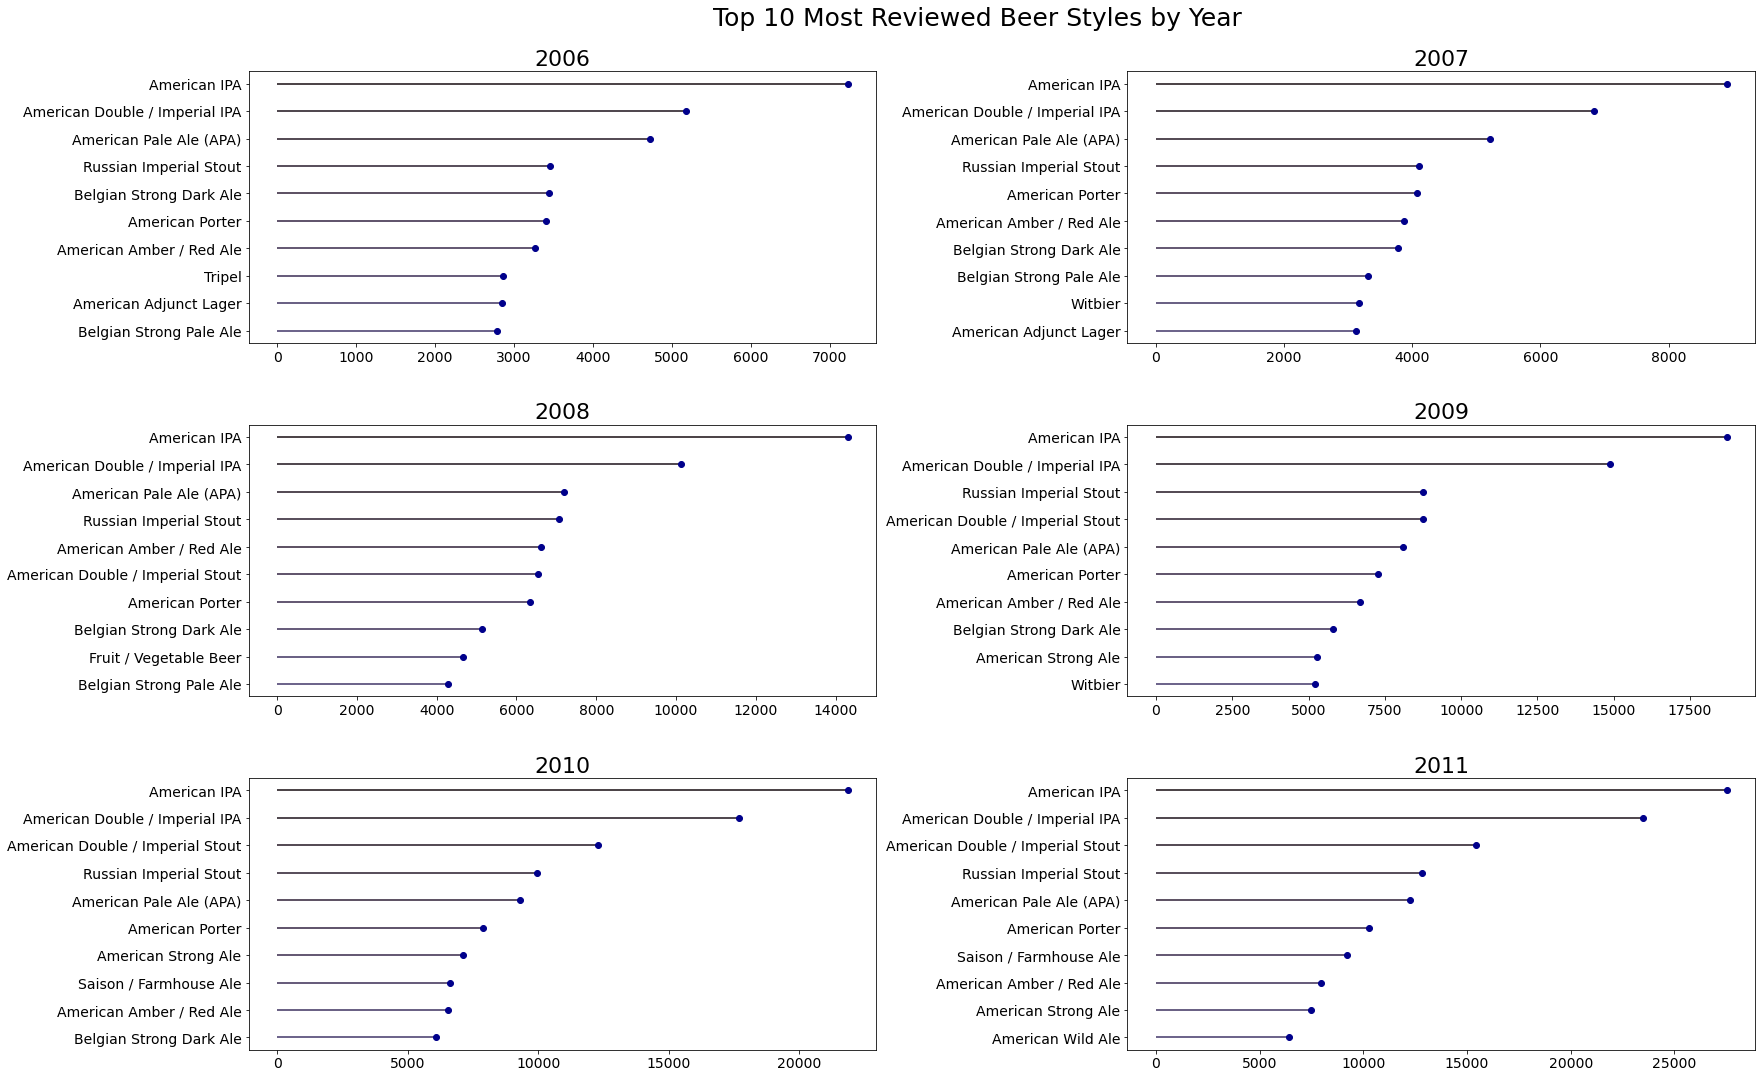

In [41]:
plt.figure(figsize=(27, 18))
for i, year in enumerate([2006, 2007, 2008, 2009, 2010, 2011]):
    plt.subplot(3, 2, i+1)
    beer_style_year = pd.DataFrame(df.loc[df['year'] == year, 'beer_style'].value_counts())
    palette = sns.color_palette('mako', 40)
    plt.hlines(y=beer_style_year[:10].index, xmin=0, xmax=beer_style_year['beer_style'][:10], color=palette)
    plt.plot(beer_style_year['beer_style'][:10], beer_style_year[:10].index,  "o", color="darkblue")
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"{year}", fontsize=22)
    plt.suptitle('Top 10 Most Reviewed Beer Styles by Year', y=0.93, fontsize=25)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

In [42]:
rare_styles = df_style[df_style['beer_style'] < 7500].index
common_styles = df[~df['beer_style'].isin(rare_styles)]

In [43]:
common_styles.shape

(1348271, 15)

In [44]:
common_styles['beer_style'].nunique()

60

### Beer styles with the highest rating among beer styles with a total review count of at least 7500

In [45]:
common_styles.groupby('beer_style')['review_overall'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'],ascending=[False, False])[:10]

,count,mean
beer_style,,
American Wild Ale,16718,4.10
Quadrupel (Quad),17837,4.07
American Double / Imperial Stout,49214,4.03
Russian Imperial Stout,52355,4.02
Weizenbock,9181,4.01
American Double / Imperial IPA,83632,4.00
Rye Beer,9514,3.99
American IPA,110425,3.97
Saison / Farmhouse Ale,30107,3.97


### Beer styles with the lowest rating among beer styles with a total review count of at least 7500

In [46]:
common_styles.groupby('beer_style')['review_overall'].agg({'count', 'mean'}).sort_values(by=['mean', 'count'],ascending=[True, False])[:10]

,count,mean
beer_style,,
Light Lager,13056,2.68
American Adjunct Lager,28524,3.01
Euro Pale Lager,17330,3.20
American Pale Lager,8298,3.41
Fruit / Vegetable Beer,31774,3.42
Herbed / Spiced Beer,9914,3.47
American Amber / Red Lager,8441,3.57
American Blonde Ale,10712,3.61
Pumpkin Ale,14661,3.62


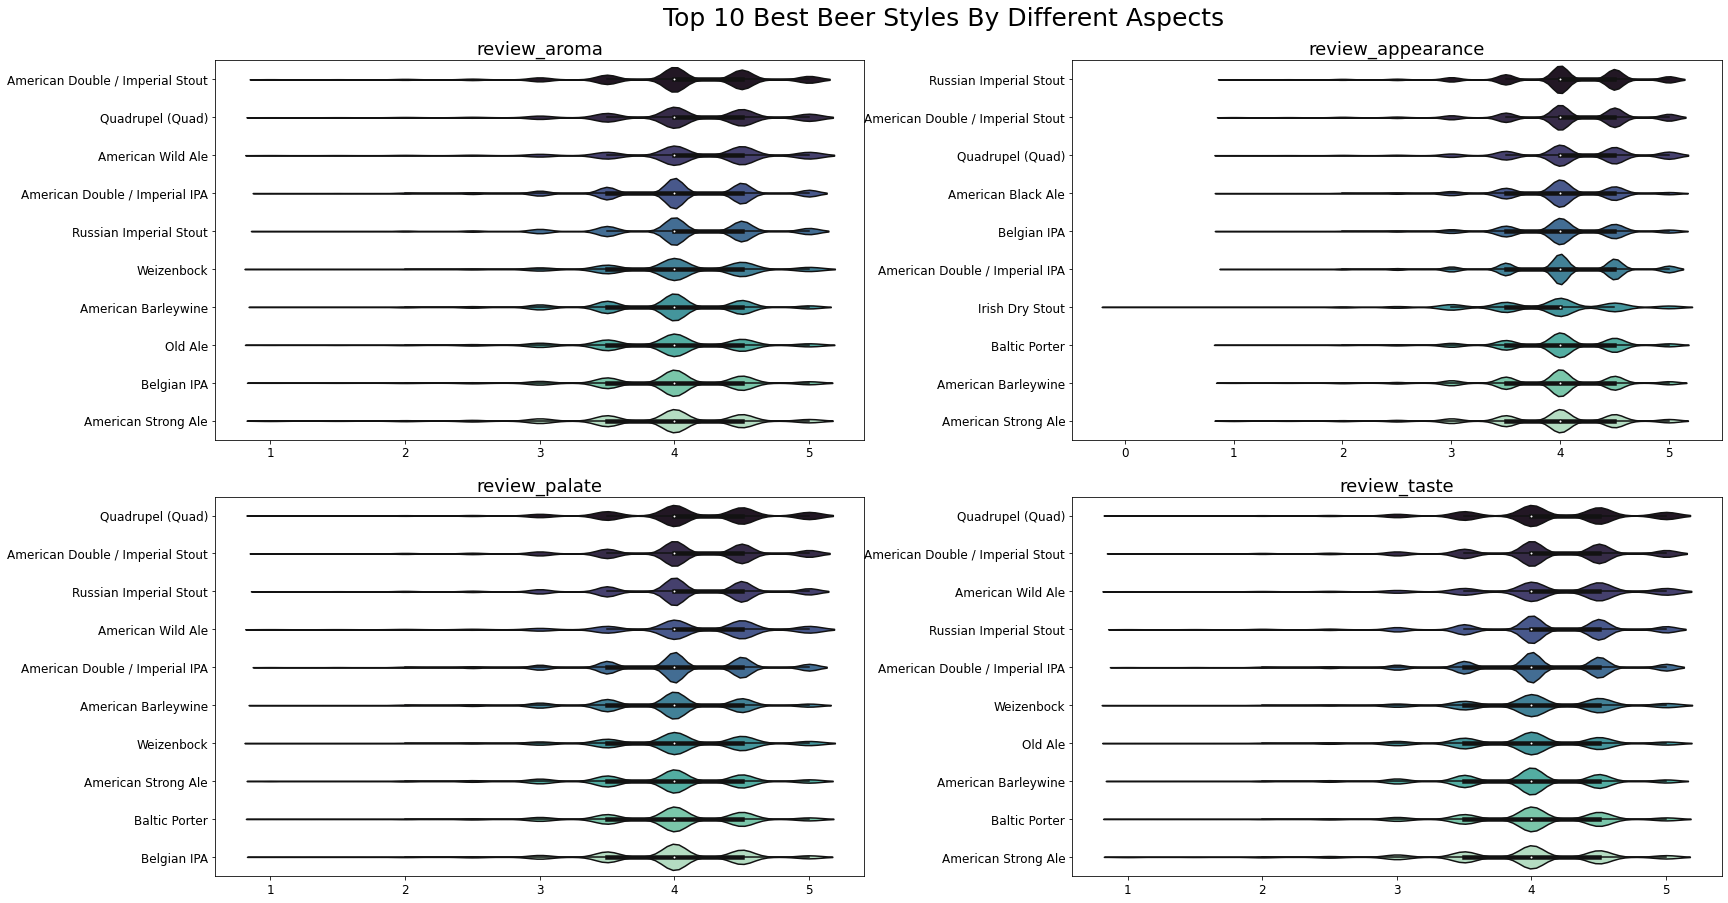

In [47]:
plt.figure(figsize=(27, 15))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    order = common_styles.groupby('beer_style')[col].mean().sort_values(ascending=False)[:10].index
    ax = sns.violinplot(y='beer_style', x="review_overall" ,palette='mako', data=df, order=order)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"{col}",fontsize=18)
    plt.suptitle('Top 10 Best Beer Styles By Different Aspects', y=0.93, size=25)
plt.subplots_adjust(wspace=0.32, hspace=0.15)
plt.show()

- Although American Wild Ale has the highest ratings overall, it is seen that it is not ahead in any sub-criteria.

## ABV Analysis

ABV, or alcohol by volume, is the standard measurement, used worldwide, to assess the strength of a particular beer.  The ABV scale is simple in the fact that the higher the ABV, the more alcohol that beer contains.  Lighter beers range from 4-4.5% ABV, with percentages getting higher with heavier styles of beer.  

*https://shorecraftbeer.com/abv-and-ibu-explained/


In [48]:
df.groupby('abv_group')['review_overall', 'beer_name'].agg({'review_overall':['count', 'mean'],
                                                            'beer_name':'nunique'}).sort_values(by=('review_overall','mean'),ascending=False)

review_overall      beer_name
                          count mean   nunique
abv_group                                     
very_high                127598 3.96      2018
high                     282322 3.94      5454
medium_high              405653 3.92     11232
medium                   567486 3.73     19622
extremely_strong          10385 3.60       120
light                    102819 3.48      6746

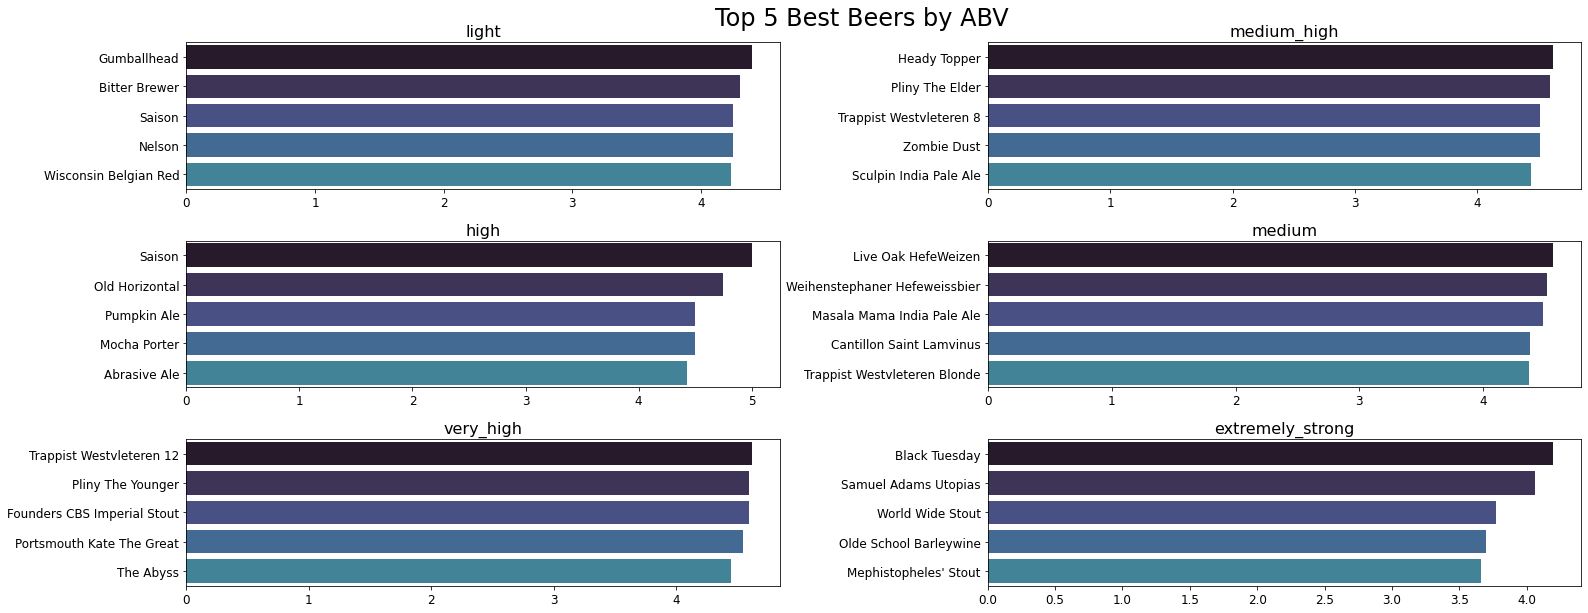

In [49]:
plt.figure(figsize=(25, 10))
beer_group = common_beers['abv_group'].unique().tolist()
for i, group in enumerate(beer_group):
    plt.subplot(3, 2, i+1)
    palette = sns.color_palette('mako', 8)
    sub_group = common_beers[common_beers['abv_group'] == group].groupby('beer_name').review_overall.mean().sort_values(ascending=False).reset_index()[:5]
    ax = sns.barplot(x='review_overall', y="beer_name", data=sub_group, palette=palette, order=sub_group['beer_name'])
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"{group}",fontsize=16)
    plt.suptitle('Top 5 Best Beers by ABV', y=0.93, size=24)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

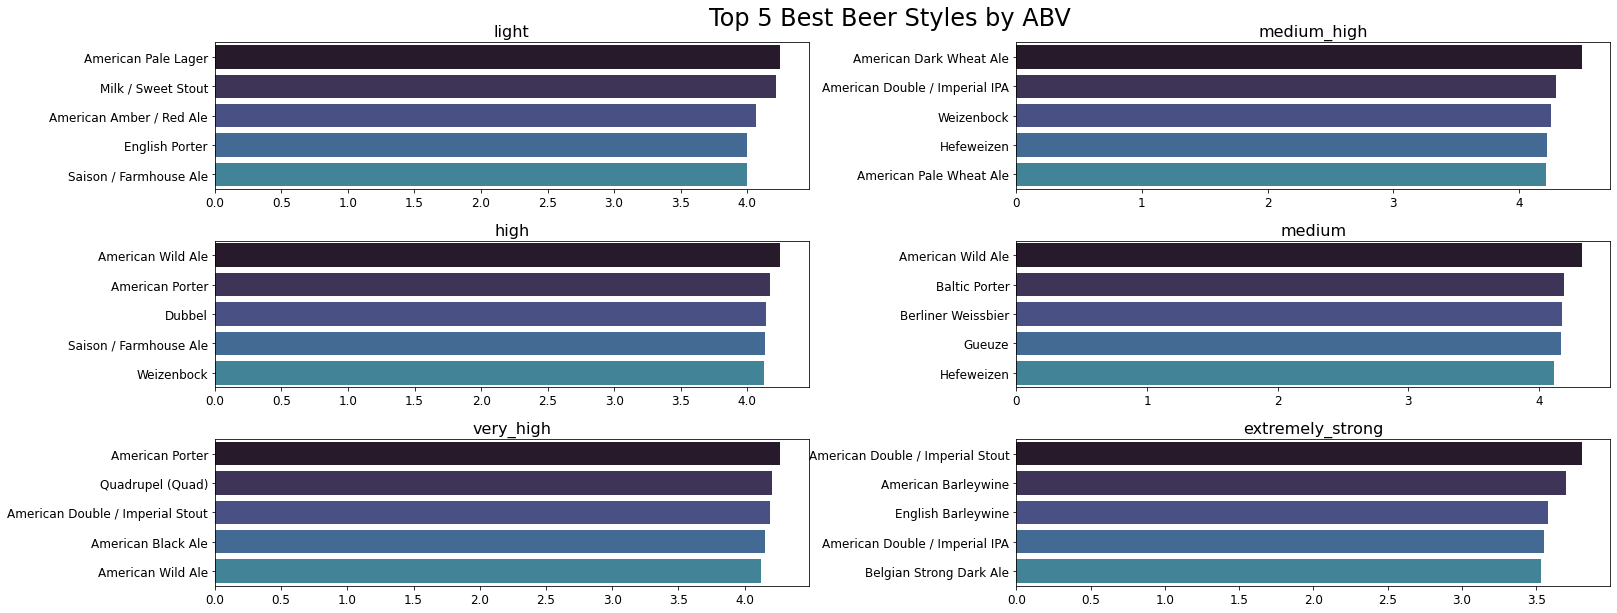

In [50]:
plt.figure(figsize=(25, 10))
for i, group in enumerate(beer_group):
    plt.subplot(3, 2, i+1)
    palette = sns.color_palette('mako', 8)
    sub_group = common_beers[common_beers['abv_group'] == group].groupby('beer_style').review_overall.mean().sort_values(ascending=False).reset_index()[:5]
    ax = sns.barplot(x='review_overall', y="beer_style", data=sub_group, palette=palette, order=sub_group['beer_style'])
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"{group}",fontsize=16)
    plt.suptitle('Top 5 Best Beer Styles by ABV', y=0.93, size=24)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

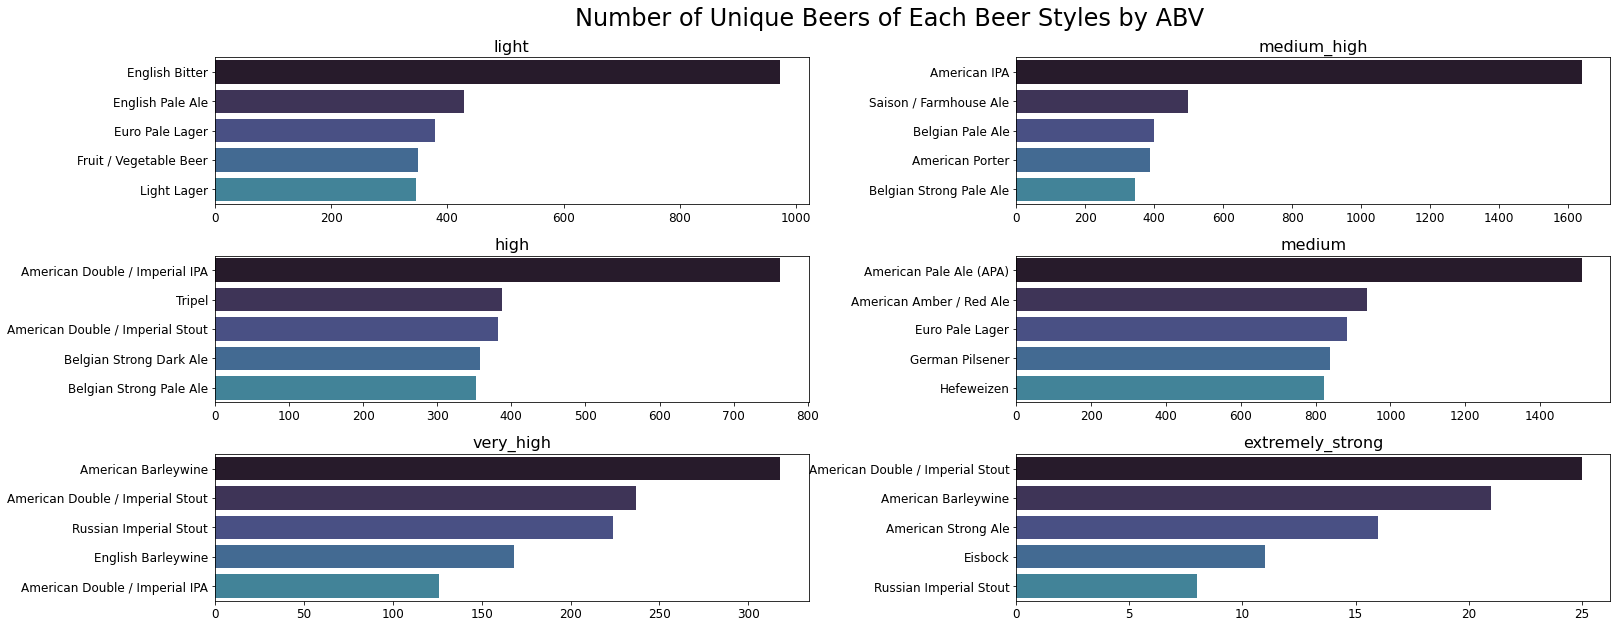

In [51]:
plt.figure(figsize=(25, 10))
for i, group in enumerate(beer_group):
    plt.subplot(3, 2, i+1)
    palette = sns.color_palette('mako', 8)
    abv_style = df.loc[df['abv_group'] == group, ['beer_name', 'beer_style']].groupby('beer_style')[['beer_name']].  \
                                                                             nunique().sort_values(by='beer_name', ascending=False).reset_index()[:5]
    ax = sns.barplot(x='beer_name', y="beer_style", data=abv_style, palette=palette, order=abv_style['beer_style'])
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"{group}",fontsize=16)
    plt.suptitle('Number of Unique Beers of Each Beer Styles by ABV', y=0.95, size=24)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()